In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path


In [52]:
def get_path(dir):
    project_dir = os.path.abspath('')
    image_dir = os.path.join(project_dir, *dir)
    path = os.path.join(project_dir , image_dir)
    return path

path = get_path(["data", "raw"])
_, _, filenames = next(os.walk(path))
filenames = filter(lambda x : x.endswith('.csv'), filenames)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(os.path.join(path, filename)))
df = pd.concat(dfs)
df.reset_index(inplace=True)
df["publ_time"] = pd.to_datetime(df.publ_time)
df.head()

,index,rating,url,text,tags,title,image_count,video_count,publ_time,author_name
0,0,26,https://pikabu.ru/story/14_fevralya_velosipedi...,NaN,"['Mtbfreeride', 'Велосипед', 'Видео']",14 февраля велосипедиста.,0,1,2019-02-15 23:57:05+03:00,naglaya.naglost
1,1,-24,https://pikabu.ru/story/printsip_smn_6509163,NaN,"['Картинка с текстом', 'Юмор', 'Принципы']",Принцип СМН,1,0,2019-02-15 23:50:59+03:00,MrsGlorian
2,2,-17,https://pikabu.ru/story/miks_dnya_6509161,"Всем доброго дня!\n\n""My home chillout""\n\nЧто...","['Кальян', 'Микс', 'Покур']",Микс дня!,1,0,2019-02-15 23:50:40+03:00,Vaness97
3,3,451,https://pikabu.ru/story/babi_radosti_6509160,NaN,"['Маркетинг', 'Краснодар', 'День святого Вален...",Бабьи радости,1,0,2019-02-15 23:50:27+03:00,DenWar13
4,4,-21,https://pikabu.ru/story/shapka_yutub_shapka_dl...,NaN,"['Шапка канала', 'Шапка для канала', 'Youtube'...","Шапка Ютуб, шапка для канала. Обучение.",0,1,2019-02-15 23:49:59+03:00,Natis4as


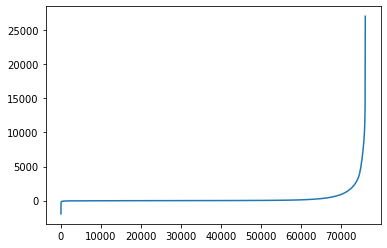

In [53]:
plt.plot(df.sort_values(by=['rating']).rating.values)
plt.show()

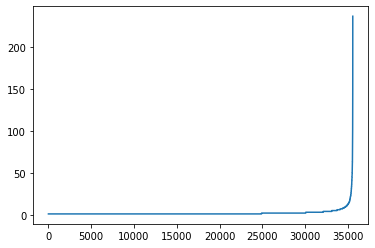

,index,rating,url,text,tags,title,image_count,video_count,publ_time
count,35576.000000,35576.000000,35576.000000,35576.000000,35576.000000,35576.000000,35576.000000,35576.000000,35576.000000
mean,2.127951,2.127951,2.127951,1.493647,2.127951,2.127951,2.127951,2.127951,2.127951
std,5.038164,5.038164,5.038164,3.368201,5.038164,5.038164,5.038164,5.038164,5.038164
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,237.000000,237.000000,237.000000,149.000000,237.000000,237.000000,237.000000,237.000000,237.000000


In [54]:
authors = df.groupby('author_name').count().sort_values(by=['url'])
plt.plot(authors.url.values)
plt.show()
authors.describe()

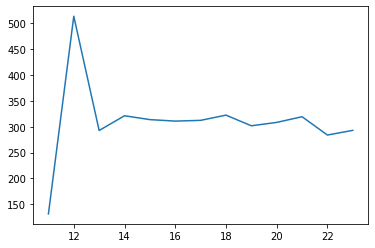

In [55]:
df['publ_hour'] = df['publ_time'].apply(lambda x: x.hour)
x = df.sort_values(by=['publ_hour'])
x = x.groupby("publ_hour").mean()
plt.plot([i for i in range(11, 11 + x.shape[0])], x.rating.values)

index      rating  image_count  video_count  publ_hour
publ_weekday                                                             
0             450.510396  308.999584     1.830191     0.186859  18.835736
1             452.430995  321.373482     1.729901     0.206765  18.860082
2             449.987049  312.011841     1.699352     0.217114  18.821832
3             452.725066  302.629743     1.695187     0.200832  18.991682
4             452.292315  286.477497     1.769535     0.217119  18.801657
5             456.859096  307.336327     1.821839     0.212372  18.347262
6             454.944235  320.346745     1.880314     0.222824  18.587765
<ipython-input-61-bd7fd362eb3d>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes 

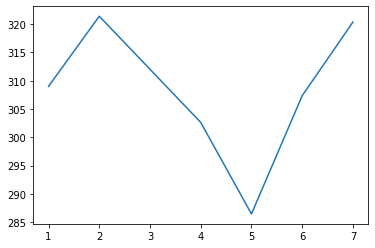

In [61]:
df['publ_weekday'] = df['publ_time'].apply(lambda x: x.weekday)
x = df.sort_values(by=['publ_weekday'])
x = x.groupby("publ_weekday").mean()
plt.plot([i for i in range(1, 8)], x.rating.values)
ax = plt.subplot(1, 1, 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

In [65]:
rate_dec_quantile = ["-inf"]
for i in range(0, 11):
    rate_dec_quantile.append(df.quantile(i / 10).rating)
    print(rate_classes[i + 1])
rate_dec_quantile.append("inf")

rate_ranges = {}

for i in range(0, len(rate_dec_quantile) - 1):
    rate_ranges[i] = (rate_dec_quantile[i], rate_dec_quantile[i + 1])

print(rate_ranges)

-18.0
-9.0
0.0
6.0
12.0
21.0
48.0
141.0
633.0
27021.0
-1943.0
{0: ('-inf', -1943.0), 1: (-1943.0, -18.0), 2: (-18.0, -9.0), 3: (-9.0, 0.0), 4: (0.0, 6.0), 5: (6.0, 12.0), 6: (12.0, 21.0), 7: (21.0, 48.0), 8: (48.0, 141.0), 9: (141.0, 633.0), 10: (633.0, 27021.0), 11: (27021.0, 'inf')}
